<h1>Data Analysis on weather history data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<h3>Collecting data

In [2]:
file=pd.read_csv("weatherHistory.csv")

In [3]:
 file.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


<h3>Accessing data

In [4]:
file.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [5]:
file.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [6]:
file.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [7]:
print('Number of rows: ',file.shape[0],'\nNumber of columns: ',file.shape[1])

Number of rows:  96453 
Number of columns:  12


<h3>Data cleaning

In [8]:
file['Humidity'].describe()

count    96453.000000
mean         0.734899
std          0.195473
min          0.000000
25%          0.600000
50%          0.780000
75%          0.890000
max          1.000000
Name: Humidity, dtype: float64

In [9]:
import random
print('Number of Missing values in Humidity:',file['Humidity'].isnull().sum())
mean = file['Humidity'].mean()
std = file['Humidity'].std()
lower_limit = round(mean-std,0)
upper_limit = round(mean+std,0)
random_list=[]
for i in range(0,177):
    random_list.append(random.randint(lower_limit,upper_limit))
random_list=np.array(random_list)
Humidity=file['Humidity'].values
k=0
for i,j in enumerate (Humidity):
    if np.isnan(Humidity[i]):
        Humidity[i]=random_list[k]
        k+=1
file['Humidity']=Humidity
print('Number of missing values in Humidity: ',file['Humidity'].isnull().sum())

Number of Missing values in Humidity: 0
Number of missing values in Humidity:  0


In [10]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


<h3>Thus we can conclude that their are no missing values</h3>

<h2>Data Visualization and basic analysis</h2>

In [11]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [12]:
print(file.corr())

                          Temperature (C)  Apparent Temperature (C)  Humidity  \
Temperature (C)                  1.000000                  0.992629 -0.632255   
Apparent Temperature (C)         0.992629                  1.000000 -0.602571   
Humidity                        -0.632255                 -0.602571  1.000000   
Wind Speed (km/h)                0.008957                 -0.056650 -0.224951   
Wind Bearing (degrees)           0.029988                  0.029031  0.000735   
Visibility (km)                  0.392847                  0.381718 -0.369173   
Loud Cover                            NaN                       NaN       NaN   
Pressure (millibars)            -0.005447                 -0.000219  0.005454   

                          Wind Speed (km/h)  Wind Bearing (degrees)  \
Temperature (C)                    0.008957                0.029988   
Apparent Temperature (C)          -0.056650                0.029031   
Humidity                          -0.224951              

In [13]:
import numpy as numpyInstace
import pandas as pandasInstance
import matplotlib.pyplot as matplotlibInstace
import seaborn as seabornInstace

Let's Check The relationship between temperature and Humidity using scatter plot

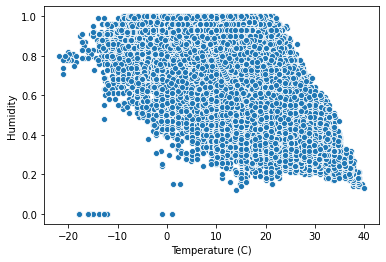

In [17]:
seabornInstace.scatterplot(x='Temperature (C)',y='Humidity',data=file)

Now check at what temperature their is most humidity using joint plot

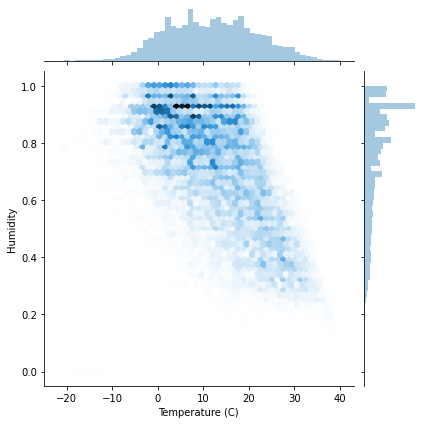

In [18]:
seabornInstace.jointplot(x='Temperature (C)',y='Humidity',data=file,kind='hex')

Now We will  Check Linearity between temperature and humidity 

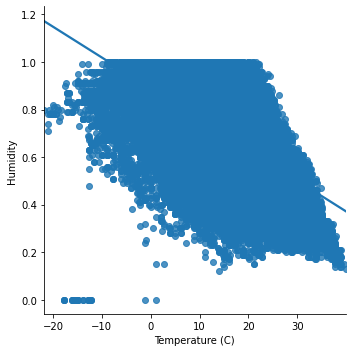

In [19]:
seabornInstace.lmplot(x='Temperature (C)',y='Humidity',data=file)

Let's Check the Average Temperature

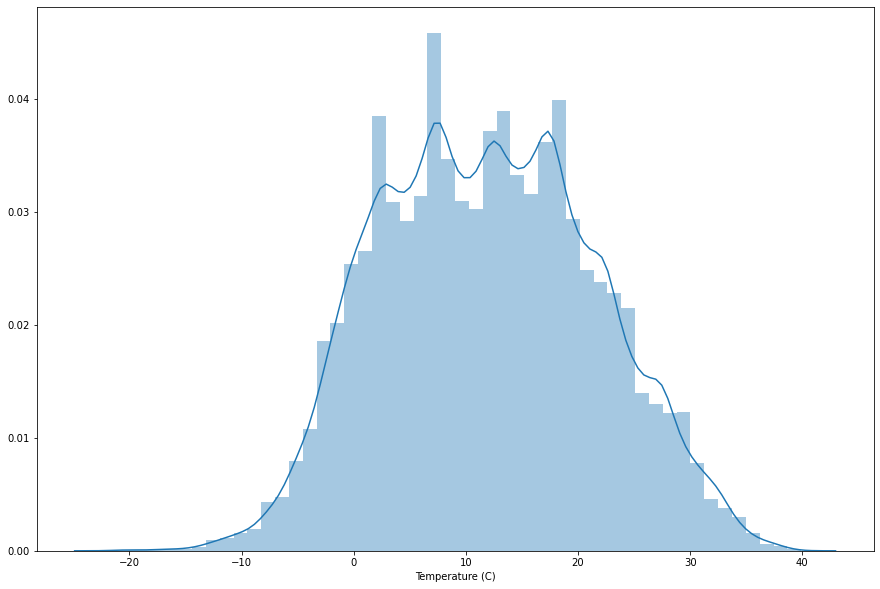

In [20]:
matplotlibInstace.figure(figsize=(15,10))
matplotlibInstace.tight_layout()
seabornInstace.distplot(file['Temperature (C)'])

Checking Relationship between Each other Using Heatmap

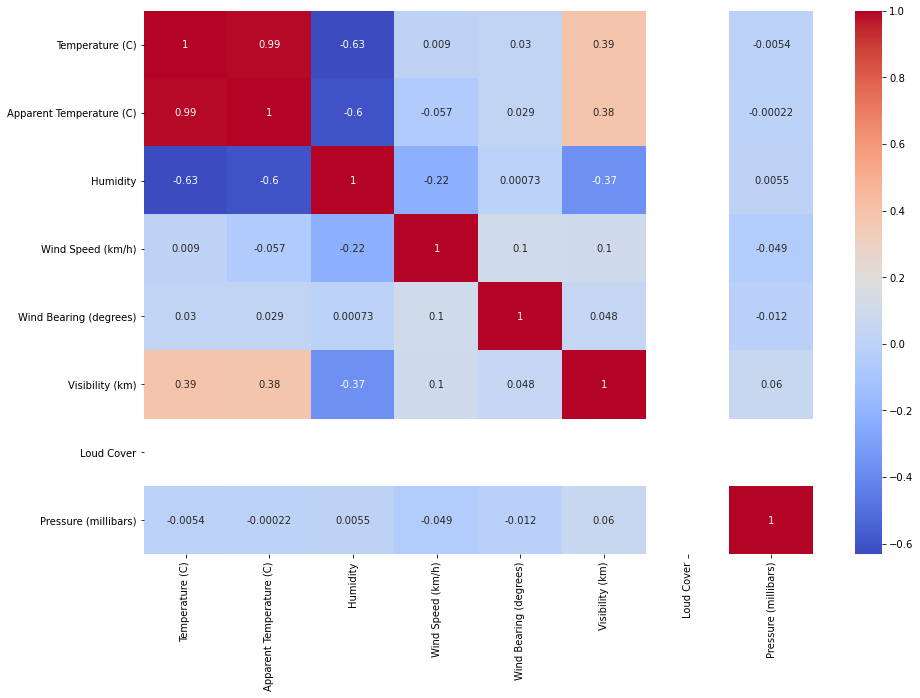

In [21]:
matplotlibInstace.figure(figsize=(15,10))
matplotlibInstace.tight_layout()
seabornInstace.heatmap(file.corr(),annot=True,cmap = 'coolwarm')

Now Working With Data Training,Testing and Making Predictions

In [22]:
X_Features=file[['Humidity']]

In [25]:
print(X_Features)

       Humidity
0          0.89
1          0.86
2          0.89
3          0.83
4          0.83
...         ...
96448      0.43
96449      0.48
96450      0.56
96451      0.60
96452      0.61

[96453 rows x 1 columns]


Now Let's predict data

In [27]:
Y_Prediction = file[['Temperature (C)']]

In [28]:
print(Y_Prediction)

       Temperature (C)
0             9.472222
1             9.355556
2             9.377778
3             8.288889
4             8.755556
...                ...
96448        26.016667
96449        24.583333
96450        22.038889
96451        21.522222
96452        20.438889

[96453 rows x 1 columns]


Training and Testing Data using scikit-learn library

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_Features, Y_Prediction, test_size=0.40, random_state=101)


Using Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

In [38]:
linearRegressionInstance=LinearRegression()

In [39]:
linearRegressionInstance

LinearRegression()

Train the Model

In [40]:
linearRegressionInstance.fit(X_train,y_train)

LinearRegression()

Checking for Intercept and Coefficient

In [43]:
linearRegressionInstance.intercept_

array([34.66142909])

In [44]:
linearRegressionInstance.coef_

array([[-30.86498611]])

In [46]:
coefficientInformation = pandasInstance.DataFrame(data=linearRegressionInstance.coef_,index=X_train.columns,columns=['Co-Efficient Values'])

In [47]:
coefficientInformation

,Co-Efficient Values
Humidity,-30.864986


Let's Make prediction for temperature values

In [51]:
temperaturePredictions=linearRegressionInstance.predict(X_test)

In [52]:
temperaturePredictions

array([[12.4386391 ],
       [ 5.03104243],
       [ 7.80889118],
       ...,
       [14.90783798],
       [24.78463354],
       [15.21648784]])

Now checking the difference between actual and predicted values using scatter plot

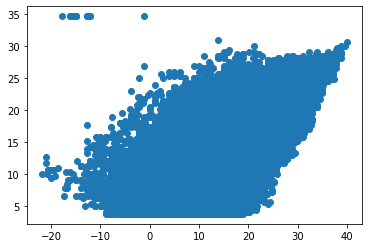

In [53]:
matplotlibInstace.scatter(y_test,temperaturePredictions)

Checking for distribution of residual

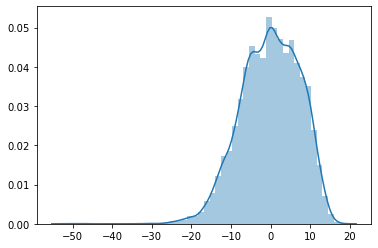

In [54]:
seabornInstace.distplot(y_test-temperaturePredictions)

Working with Errors

In [56]:
from sklearn import metrics

In [57]:
metrics.mean_absolute_error(y_test,temperaturePredictions)

6.015928911872608

In [58]:
metrics.mean_squared_error(y_test,temperaturePredictions)

54.610397511477

In [59]:
numpyInstace.sqrt(metrics.mean_squared_error(y_test,temperaturePredictions))

7.389884810433583

Let's Recall the Value of CoEfficient again here

In [60]:
coefficientInformation

,Co-Efficient Values
Humidity,-30.864986


<h1>Thus using this Analysis We can conclude that  humidity is increased by one unit the Temperature will Reduce by 30.864986 units